In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, how="left", on="city")

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

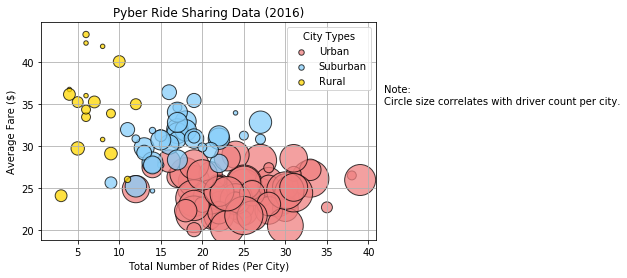

In [9]:
# Set the overall graph properties.
plot_colors = {
    "Urban"   : "lightcoral",
    "Suburban": "lightskyblue",
    "Rural"   : "gold"}
linewidth = 1
edgecolor = "black"

# marker opacity
alpha = 0.75

# Draw the scatter plot for each city type.
for city_type in pyber_data["type"].unique():
    
    # Group data by city for each city type.
    type_group = pyber_data.loc[pyber_data["type"] == city_type].groupby("city")
    
    # Obtain the x and y coordinates for each of the three city types.
    x_values = type_group["city"].count()
    y_values = type_group["fare"].mean()
    
    # Set the size of each data point.
    sizes = type_group["driver_count"].first()*20
   
    plt.scatter(x_values, 
                y_values, 
                label=city_type, 
                c=plot_colors[city_type], 
                s=sizes, 
                linewidth=linewidth,
                edgecolor=edgecolor,
                alpha=alpha)

# Create the legend.
legend = plt.legend(title = "City Types", loc="best")

# Resize the markers in the legend.
for n in range(0, len(legend.legendHandles)):
    legend.legendHandles[n]._sizes = [30]

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Place the text label incorporating size at the right edge of the chart.
plt.text(plt.xlim()[1]+1, 35, s="Note:\nCircle size correlates with driver count per city.")

plt.show()

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

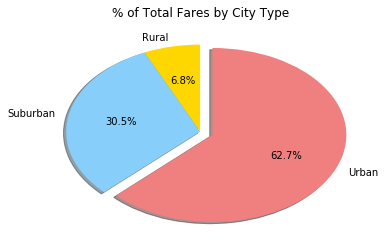

In [4]:
# Calculate Type Percents
type_groups = pyber_data.groupby(["type"])
total_fares = type_groups["fare"].sum()

# Build Pie Chart
labels = sorted(plot_colors.keys())
explode = (0, 0, 0.1)
colors = [plot_colors[key] for key in sorted(plot_colors.keys())]
plt.title("% of Total Fares by City Type")

# Save Figure
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

## Total Rides by City Type

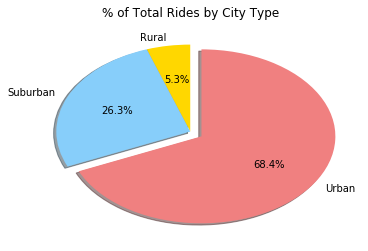

In [5]:
# Calculate Ride Percents
type_groups = pyber_data.groupby(["type"])
total_rides = type_groups["ride_id"].count()

# Build Pie Chart
labels = sorted(plot_colors.keys())
explode = (0, 0, 0.1)
colors = [plot_colors[key] for key in sorted(plot_colors.keys())]
plt.title("% of Total Rides by City Type")

# Save Figure
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

## Total Drivers by City Type

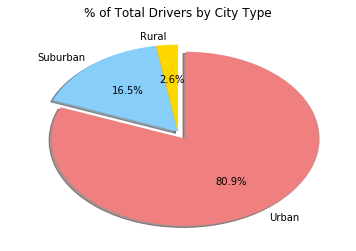

In [6]:
# Calculate Driver Percents

# Use city_data.csv because it already has the driver_counts.
type_groups = city_data.groupby(["type"])
total_drivers = type_groups["driver_count"].sum()

# Build Pie Chart
labels = sorted(plot_colors.keys())
explode = (0, 0, 0.1)
colors = [plot_colors[key] for key in sorted(plot_colors.keys())]
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()